# to-do
1. Check behaviour of phi_nl and sph_harm_lm
2. Check scale of sph_harm at higher terms.
3. Is the potential affected by this high order terms?
4. Check that the derivation of A_nl is correct.
5. Check the behaviour of the energy term
6. Check the effect of not choosing the right scale length

In [1]:
%pylab inline
from scipy import special
#plt.style.use('dark_background')
import biff
import pygadgetreader
#from gala.potential.scf import compute_coeffs, compute_coeffs_discrete

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
def xi_transformation(r):
    return (r-1)/(r+1)

def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

def phi_nl(n, l, r, a):
    xi = xi_transformation(r)
    return - special.eval_gegenbauer(n, 2*l + 3/2., xi)*(4*np.pi)**(0.5)*(r/a)**l/((1+r/a)**(2*l+1))  

In [4]:
def snl(n, l, m, m_p, r_p, theta_p, phi_p, a):
    A_nl = Anl(n,l)
    if m==0:
        S_nl = A_nl * np.sum(m_p*phi_nl(n, l, r_p, a)*special.sph_harm(m, l, 0, theta_p)*np.cos(m*phi_p))
        print(np.sum(phi_nl(n, l, r_p, a)), np.sum(special.sph_harm(m, l, 0, theta_p)), A_nl)
    if m!=0:
        S_nl = 2.*A_nl * np.sum(m_p*phi_nl(n, l, r_p, a)*special.sph_harm(m, l, 0, theta_p)*np.cos(m*phi_p))
    return S_nl.real, np.sum(phi_nl(n, l, r_p, a)), np.sum(special.sph_harm(m, l, 0, theta_p))

In [5]:
theta_t = np.linspace(0, np.pi, 100)
sph_harm_matrix = np.zeros((20, 100))
for l in range(0, 20):
    sph_harm_matrix[l] = special.sph_harm(0, l, 0, theta_t)

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


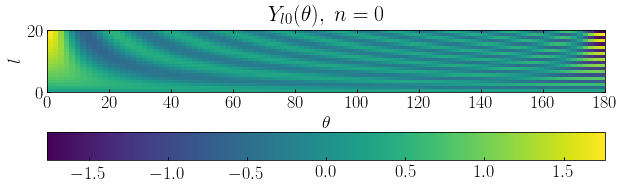

In [6]:
figure(figsize=(10, 5))
title(r'$Y_{l0}(\theta),\ n=0$')
imshow(sph_harm_matrix, origin='lower', extent=[0, 180, 0, 20], cmap='viridis')
colorbar(orientation='horizontal')
ylabel('$l$')
xlabel(r'$\theta$')

savefig('spherical_harmonics_theta_dependence.png', bbox_inches='tight')
savefig('spherical_harmonics_theta_dependence.pdf', bbox_inches='tight')

In [8]:
r_t = np.logspace(0, 2, 100)
phi_nl_matrix = np.zeros((20, 100))
for l in range(0, 20):
    phi_nl_matrix[l] = phi_nl(0, l, r_t, 1)

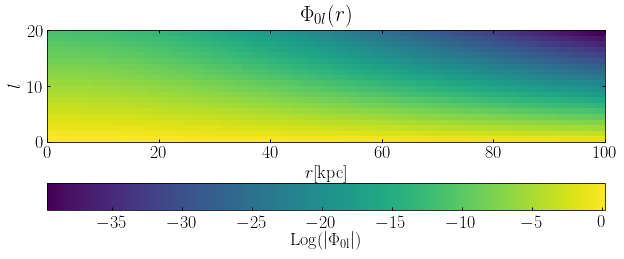

In [9]:
figure(figsize=(10, 5))
title(r'$\Phi_{0l}(r)$')
imshow(np.log10(np.abs(phi_nl_matrix)), origin='lower', extent=[0, 100, 0, 20], cmap='viridis')
cbar = colorbar(orientation='horizontal')
ylabel('$l$')
xlabel('$r$[kpc]')
cbar.set_label(r'$\rm{Log}(|\Phi_{0l}|)$')

savefig('phi_nl_radial_depndence.pdf', bbox_inches='tight')

In [10]:
# Que pasa con esta linea? 
phi_nl_matrix[:,0]

array([ -1.77245385e+00,  -4.43113463e-01,  -1.10778366e-01,
        -2.76945914e-02,  -6.92364786e-03,  -1.73091196e-03,
        -4.32727991e-04,  -1.08181998e-04,  -2.70454994e-05,
        -6.76137486e-06,  -1.69034371e-06,  -4.22585929e-07,
        -1.05646482e-07,  -2.64116205e-08,  -6.60290514e-09,
        -1.65072628e-09,  -4.12681571e-10,  -1.03170393e-10,
        -2.57925982e-11,  -6.44814955e-12])

In [11]:
product_matrix = np.zeros((20, 100))
for l in range(0, 20):
    product_matrix[l] = phi_nl(0, l, r_t, 1) * special.sph_harm(0, l, 0, theta_t).real

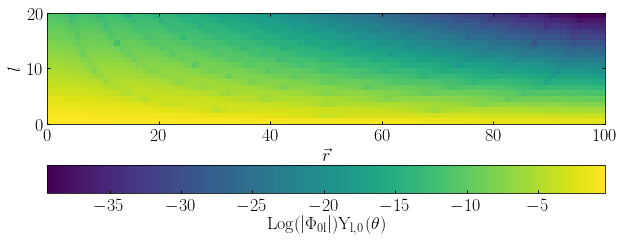

In [12]:
figure(figsize=(10, 5))
imshow(np.log10(np.abs(product_matrix)), origin='lower', extent=[0, 100, 0, 20], cmap='viridis')
cbar = colorbar(orientation='horizontal')
ylabel('$l$')
xlabel(r'$\vec{r}$')
cbar.set_label(r'$\rm{Log}(|\Phi_{0l}|) Y_{l,0}(\theta)$')

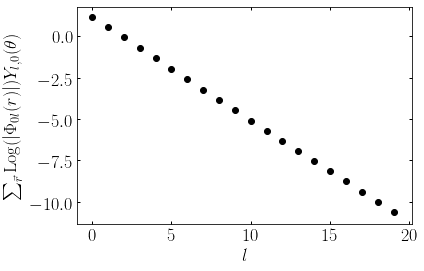

In [13]:
for i in range(20):
    scatter(i, np.log10(np.abs(np.sum(product_matrix[i]))), c='k')
xlabel('$l$')
ylabel(r'$\sum_{\vec{r}} \mathrm{Log}(|\Phi_{0l}(r)|) Y_{l,0}(\theta)$')

savefig('sum_prodcut_matrix_l.pdf', bbox_inches='tight')

In [14]:
# data:
spherical_halo = pygadgetreader.readsnap('../data/hern_halo_1E5_010', 'pos', 'dm')
spherical_halo_m = pygadgetreader.readsnap('../data/hern_halo_1E5_010', 'mass', 'dm')

#spherical_halo = pygadgetreader.readsnap('../data/LMC1_97K_vir_000', 'pos', 'dm')

#m = pygadgetreader.readsnap('../data/LMC3_2M_vir_009', 'mass', 'dm')

Returning DM    Positions
Returning DM    Mass


In [15]:
x = spherical_halo[:,0]
y = spherical_halo[:,1]
z = spherical_halo[:,2]
m = spherical_halo_m

In [16]:
r = (x**2 + y**2 + z**2)**0.5
index_rcut = np.where(r<100)

x_cut = x[index_rcut]
y_cut = y[index_rcut]
z_cut = z[index_rcut]
m_cut = m[index_rcut]
r_cut = (x_cut**2 + y_cut**2 + z_cut**2)**0.5


(-100, 100)

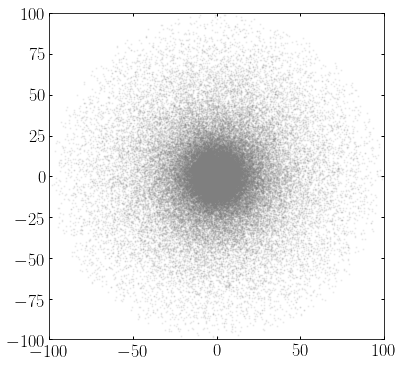

In [17]:
figsize(6,6)
scatter(x_cut, z_cut, s=1, alpha=0.1, c='C7')
xlim(-100, 100)
ylim(-100, 100)


In [18]:
theta = np.arccos(z_cut/r_cut)
phi = np.arctan2(y_cut, x_cut)


In [19]:
snl(0, 0, 0, m_cut, r_cut, theta, phi, 40.8)

-151968.390671 (20080.9177524+0j) -3.0


(154.33824671743935, -151968.39067062637, (20080.917752423524+0j))

In [20]:
snl(10, 10, 0, m_cut, r_cut, theta, phi, 40.8)

-423516125.138 (-61.386129218+0j) -2.16078783072


(-2854.4169960961558, -423516125.13782847, (-61.386129218010971+0j))

In [21]:
spherical_halo[index_rcut]

array([[-24.1621933 ,  12.91808414,   1.11863124],
       [ -6.43855381,  21.80490112, -11.13853264],
       [ -2.88431549,   6.1406126 , -22.44001961],
       ..., 
       [ 42.49369812, -30.07404709, -20.77810669],
       [-28.78679085, -10.97197533,  77.00736237],
       [ -7.62183142,  14.02430725, -16.82109642]], dtype=float32)

In [22]:
S_biff, T_biff = biff.compute_coeffs_discrete(np.double(spherical_halo[index_rcut]), np.double(m_cut), 10, 20, skip_m=False, r_s=40.8)

In [23]:
shape(S_biff)

(11, 21, 21)

Text(0,0.5,'$l$')

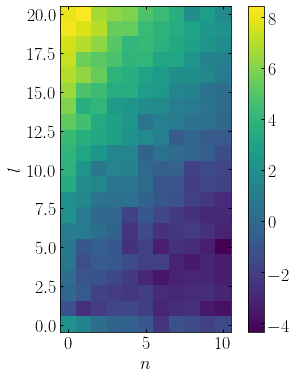

In [24]:
imshow(np.log10(np.abs(S_biff[:,:,0])).T, origin='lower')
colorbar()
xlabel('$n$')
ylabel('$l$')

In [30]:
snl(0, 20, 0, m_cut, r_cut, theta, phi, 40.8)

-3.68447129985e-08 (52.6967372193+0j) -2.04745181245e+22


(-118345521.80511218, -3.6844712998523623e-08, (52.696737219291805+0j))

In [31]:
S_biff[0, 20, 0]

-118344916.27963065

In [32]:
S_biff[0,0,0]

154.33824771186164

In [33]:
snl(0, 0, 0, m_cut, r_cut, theta, phi, 40.8)

-151968.390671 (20080.9177524+0j) -3.0


(154.33824671743935, -151968.39067062637, (20080.917752423524+0j))

In [34]:
snl(0, 10, 0, m_cut, r_cut, theta, phi, 40.8)

-0.0530183744204 (-61.386129218+0j) -50097594374.3


(-7931.240641858235, -0.053018374420398647, (-61.386129218010971+0j))

Text(0.5,0,'$n$')

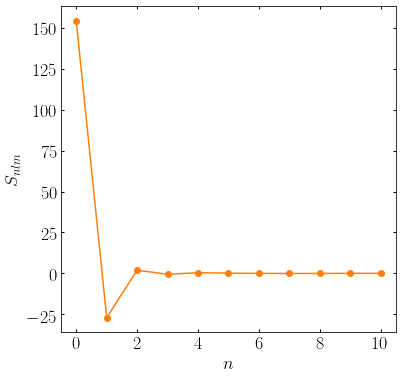

In [35]:
plot(np.arange(0, 11, 1), (S_biff[:,0,0]), '-o', c='C1' )
ylabel('$S_{nlm}$')
xlabel('$n$')

Text(0.5,0,'$l$')

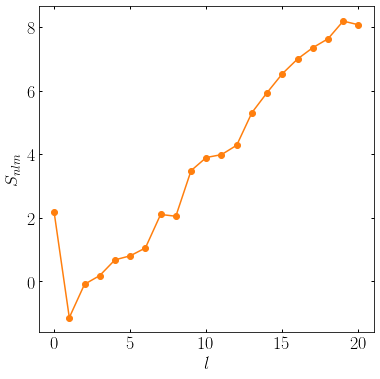

In [36]:
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[0,:,0])), '-o', c='C1' )
ylabel('$S_{nlm}$')
xlabel('$l$')

In [78]:
A_nl_array = np.zeros((11, 21))
for j in range(11):
    for i in range(21):
        A_nl_array[j][i] = Anl(j, i)

In [86]:
S_biff[:,0,0]/A_nl_array[:,0]

array([-51.44608257,  48.70428622,  -9.92008909,   6.08828407,
        -8.13736868,  -4.18584734,   0.19082006,   4.88764087,
         4.40650597,  -1.68006314,  -5.48753895])

Text(0,0.5,'Energy: $\\rm{Log}(\\frac{|S_{nlm}|}{A_{nl}})$')

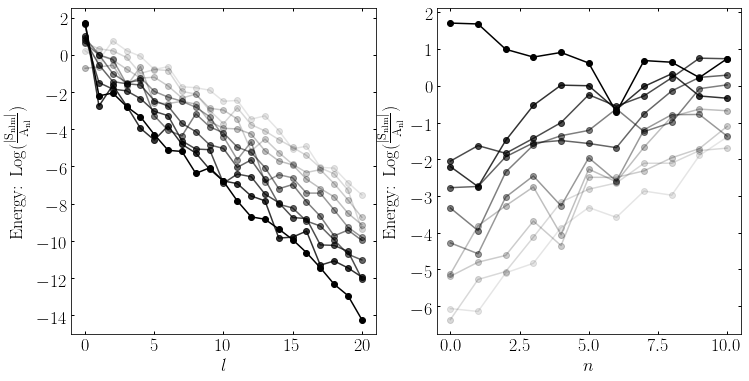

In [88]:
figure(figsize=(12, 6))
subplot(1, 2, 1)
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[0,:,0]/A_nl_array[0])), '-o', c='k')
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[1,:,0]/A_nl_array[1])), '-o', c='k', alpha=0.8)
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[2,:,0]/A_nl_array[2])), '-o', c='k', alpha=0.7)
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[3,:,0]/A_nl_array[3])), '-o', c='k', alpha=0.6)
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[4,:,0]/A_nl_array[4])), '-o', c='k', alpha=0.5)
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[5,:,0]/A_nl_array[5])), '-o', c='k', alpha=0.4)
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[6,:,0]/A_nl_array[6])), '-o', c='k', alpha=0.25)
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[7,:,0]/A_nl_array[7])), '-o', c='k', alpha=0.2)
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[8,:,0]/A_nl_array[8])), '-o', c='k', alpha=0.15)
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[9,:,0]/A_nl_array[9])), '-o', c='k', alpha=0.1)
xlabel('$l$')
ylabel(r'Energy: $\rm{Log}(\frac{|S_{nlm}|}{A_{nl}})$')

subplot(1, 2, 2)
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,0,0]/A_nl_array[:,0])), '-o', c='k')
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,1,0]/A_nl_array[:,1])), '-o', c='k', alpha=0.8)
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,2,0]/A_nl_array[:,2])), '-o', c='k', alpha=0.7)
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,3,0]/A_nl_array[:,3])), '-o', c='k', alpha=0.6)
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,4,0]/A_nl_array[:,4])), '-o', c='k', alpha=0.5)
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,5,0]/A_nl_array[:,5])), '-o', c='k', alpha=0.4)
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,6,0]/A_nl_array[:,6])), '-o', c='k', alpha=0.25)
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,7,0]/A_nl_array[:,7])), '-o', c='k', alpha=0.2)
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,8,0]/A_nl_array[:,8])), '-o', c='k', alpha=0.15)
plot(np.arange(0, 11, 1), np.log10(np.abs(S_biff[:,9,0]/A_nl_array[:,9])), '-o', c='k', alpha=0.1)
xlabel('$n$')
ylabel(r'Energy: $\rm{Log}(\frac{|S_{nlm}|}{A_{nl}})$')

In [33]:
A_nl_t = np.zeros(20)
for i in range(0, 20):
    A_nl_t[i] = Anl(0, i)

Text(0.5,0,'$l$')

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


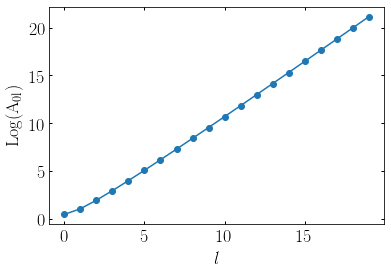

In [34]:
plot(np.arange(0, 20, 1), np.log10(np.abs(A_nl_t)), '-o')
ylabel(r'$\rm{Log}(A_{0l})$')
xlabel('$l$')

In [75]:
pot = biff.potential(np.ascontiguousarray(np.array([np.arange(1, 100, 1), np.zeros(99), np.zeros(99)]).T), S_biff, T_biff, G=1, M=np.sum(m_cut), r_s=40.8)

In [95]:
dens = biff.density(np.ascontiguousarray(np.array([np.arange(1, 100, 1), np.zeros(99), np.zeros(99)]).T), S_biff, T_biff, M=np.sum(m_cut), r_s=40.8)

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


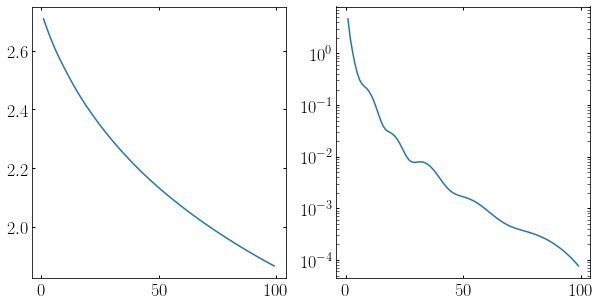

In [96]:
figure(figsize(10, 5))
subplot(1, 2, 1)
plot(np.arange(1, 100, 1), np.log10((-pot)))

subplot(1, 2, 2)
semilogy(np.arange(1, 100, 1), dens)

## The contribution of the coefficients to the density and potential.

- What is the value of the potential as a function of $n$ and $l$? 

In [ ]:
def potential(S, T, n, l, m):
    """
    
    """
    for i in n:
        for j in range l:
    pot_nlm = special.sph_harm(m, l, 0, theta_p)*phi_nl(n, l, r)*(S*cos(m*phi_p) + T*sin(m*phi_p))
    return pot_nlm
